In [1]:
% matplotlib inline

import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.learning_curve import learning_curve

# get password
with open('/Users/ian/metis/secure/mysql.password', 'r') as infile:
    password = infile.read().replace('\n', '')

%load_ext autoreload
%autoreload 2
import suplearning
# %reload_ext suplearning


### Play with NHIS Data

In [9]:
# # Get all data

# db = pymysql.connect(host="104.131.118.159",  #your cloud ip
#                      user='root',
#                      passwd=password,
#                      db='heart_disease')
# cursor = db.cursor()

# cursor.execute("SELECT * FROM nhis2013adult")
# datalist = [row for row in cursor.fetchall()]
# cursor.execute("SHOW COLUMNS FROM all_data")
# columnlist = [column[0] for column in cursor.fetchall()]

# cursor.close()
# db.close()

# column_names = ['index'] + column_names
# hd = pd.DataFrame(datalist, columns=column_names)
# print len(hd)
# hd.head()

In [73]:
# Get column names from list
bigstring = """ACN.010_00.000 HYPEV Ever been told you have hypertension 79 1 
ACN.025_00.010 CHLYR1 Had high cholesterol, past 12 months 82 1 
ACN.031_01.000 CHDEV Ever been told you had coronary heart disease 83 1 
ACN.031_02.000 ANGEV Ever been told you had angina pectoris 84 1
ACN.031_03.000 MIEV Ever been told you had a heart attack 85 1 
ACN.031_05.000 STREV Ever been told you had a stroke 87 1 
ACN.035_00.000 COPDEV Ever been told you had COPD 89 1 
ACN.160_00.000 DIBEV Ever been told that you have diabetes 242 1 
ACN.201_03.000 CBRCHYR Told you had chronic bronchitis, 12 m 257 1 
ACN.201_04.000 KIDWKYR Told you had weak/failing kidneys, 12 m 258 1 
HHC.420_00.000 AGE_P Age 48-49 2 
HHC.110_00.000 SEX Sex 39 1
HHC.200_01.000 MRACRPI2 Race coded to single/multiple race group 44-45 2


def get_field_names_from_list(thestring):
    lines = thestring.split('\n')
    return [line.split(' ')[1] for line in lines]

def create_select_string(fieldnames, database='heart_disease.nhis2013adult'):
    select_string = 'select '
    final_string = 'from ' + database
    for field in fieldnames: 
        select_string = select_string + field + ', \n'
    select_string = select_string[:-3] + ' ' + final_string
    return select_string

disease_fields = get_field_names_from_list(bigstring)
test = create_select_string(disease_fields)
print test
# print len(disease_fields)
# colnames = disease_fields[0:-1]
# colnames.append('MALE')
# colnames.append('FEMALE')
# print colnames

In [71]:
disease_conditions = """ select 
case
        when HYPEV = 1
        then 1
        when HYPEV = 2
        then 0
        else NULL
        end as HYPEV, 
case
        when CHLYR1 = 1
        then 1
        when CHLYR1 = 2
        then 0
        else NULL
        end as CHLYR1, 
case
        when CHDEV = 1
        then 1
        when CHDEV = 2
        then 0
        else NULL
        end as CHDEV, 
case
        when ANGEV = 1
        then 1
        when ANGEV = 2
        then 0
        else NULL
        end as ANGEV,
case
        when MIEV = 1
        then 1
        when MIEV = 2
        then 0
        else NULL
        end as MIEV,
case
        when STREV = 1
        then 1
        when STREV = 2
        then 0
        else NULL
        end as STREV,
case
        when COPDEV = 1
        then 1
        when COPDEV = 2
        then 0
        else NULL
        end as COPDEV, 
case 
        when DIBEV = 1
        then 1
        when DIBEV = 2
        then 2
        when DIBEV = 3
        then 1
        else NULL
        end as DIBEV,  
case
        when CBRCHYR = 1
        then 1
        when CBRCHYR = 2
        then 0
        else NULL
        end as CBRCHYR, 
case
        when KIDWKYR = 1
        then 1
        when KIDWKYR = 2
        then 0
        else NULL
        end as KIDWKYR,    
AGE_P,
case
        when SEX = 1 
        then 1
        else 0
        end as MALE,
case
        when SEX = 2
        then 1
        else 0
        end as FEMALE,     
case    
        when MRACRPI2 = 01
        then 1
        else 0
        end as WHITE,
case    
        when MRACRPI2 = 02
        then 1
        else 0
        end as BLACK,
case    
        when MRACRPI2 = 03
        then 1
        else 0
        end as INDIAN,
case    
        when MRACRPI2 = 09
        then 1
        else 0
        end as ASIANINDIAN,
case    
        when MRACRPI2 = 10
        then 1
        else 0
        end as CHINESE,
case    
        when MRACRPI2 = 11
        then 1
        else 0
        end as FILIPINO,
case    
        when MRACRPI2 = 15
        then 1
        else 0
        end as OTHERASIAN, 


colnames = ['HYPEV', 'CHLYR1', 'CHDEV', 'ANGEV', 'MIEV', 'STREV', 'COPDEV', 
             'DIBEV', 'CBRCHYR', 'KIDWKYR', 
             'AGE_P', 'MALE', 'FEMALE', 'WHITE', 'BLACK', 'INDIAN', 'ASIANINDIAN', 'CHINESE', 'FILIPINO', 
             'OTHERASIAN']

In [72]:
# Populate Data Frame

db = pymysql.connect(host="104.131.118.159",  #your cloud ip
                     user='root',
                     passwd=password,
                     db='heart_disease')
cursor = db.cursor()

cursor.execute(disease_conditions)
datalist = [row for row in cursor.fetchall()]
# cursor.execute("SHOW COLUMNS FROM all_data")
# columnlist = [column[0] for column in cursor.fetchall()]

cursor.close()
db.close()

In [243]:
hd = pd.DataFrame(datalist, columns=colnames)
print len(hd)
hd.head()

34557


,HYPEV,CHLYR1,CHDEV,ANGEV,MIEV,STREV,COPDEV,DIBEV,CBRCHYR,KIDWKYR,AGE_P,MALE,FEMALE,WHITE,BLACK,INDIAN,ASIANINDIAN,CHINESE,FILIPINO,OTHERASIAN
0,0,0,0,0,0,0,0,2,0,0,19,1,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,2,0,0,59,1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,2,0,0,22,0,1,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,60,0,1,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,2,0,0,65,0,1,1,0,0,0,0,0,0


In [244]:
# Clean dataframe
hd_clean = hd.dropna()
print len(hd)
print len(hd_clean)



# Scale only those columns that aren't binary
# STUPID NANS
from sklearn.preprocessing import scale
# nonbinary = ['BMI', 'AGE_P']
nonbinary = ['AGE_P']
hd_clean[nonbinary] = hd_clean[nonbinary].astype(float).apply(scale)
hd_clean.head()

34557
34121


,HYPEV,CHLYR1,CHDEV,ANGEV,MIEV,STREV,COPDEV,DIBEV,CBRCHYR,KIDWKYR,AGE_P,MALE,FEMALE,WHITE,BLACK,INDIAN,ASIANINDIAN,CHINESE,FILIPINO,OTHERASIAN
0,0,0,0,0,0,0,0,2,0,0,-1.626333,1,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,2,0,0,0.572360,1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,2,0,0,-1.461431,0,1,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0.627328,0,1,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,2,0,0,0.902164,0,1,1,0,0,0,0,0,0


### Do Classifying

In [245]:
# Create Classifiers()
xdf = hd_clean.drop('CHDEV', axis=1)
ydf = hd_clean['CHDEV']

data_cols = xdf.columns.values
Xdata = np.array(xdf).astype(float)
ydata = np.array(ydf).astype(float)
d = suplearning.Classifiers(Xdata, ydata, scale=False)
print data_cols

['HYPEV' 'CHLYR1' 'ANGEV' 'MIEV' 'STREV' 'COPDEV' 'DIBEV' 'CBRCHYR'
 'KIDWKYR' 'AGE_P' 'MALE' 'FEMALE' 'WHITE' 'BLACK' 'INDIAN' 'ASIANINDIAN'
 'CHINESE' 'FILIPINO' 'OTHERASIAN']


KNeighborsClassifier
Accuracy Score: 0.9587
             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98      8102
        1.0       0.67      0.34      0.45       427

avg / total       0.95      0.96      0.95      8529

AUC = 0.809
LogisticRegression
Accuracy Score: 0.9638
             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98      8102
        1.0       0.73      0.44      0.55       427

avg / total       0.96      0.96      0.96      8529

AUC = 0.932
SVC
Accuracy Score: 0.9619
             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98      8102
        1.0       0.67      0.48      0.56       427

avg / total       0.96      0.96      0.96      8529

AUC = 0.892
GaussianNB
Accuracy Score: 0.8839
             precision    recall  f1-score   support

        0.0       0.99      0.89      0.94      8102
        1.0       0.27      0.76      0.40       427

avg / total

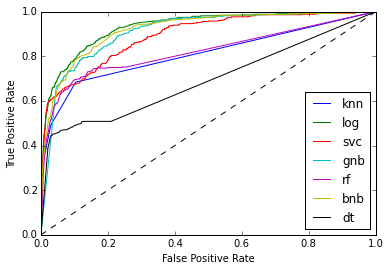

In [238]:
d.do_modeling_all(learncurve=False)

In [144]:
# d.svc_findmaxc(cmax=10, probability=True)

5.01


In [188]:
d.modelnames['svc']
d.cross_val_score('svc', d.Xdata, d.ydata, probability=True, C=5)
d.cross_val_score('log', d.Xdata, d.ydata)
d.cross_val_score('gnb', d.Xdata, d.ydata)

[ 0.95670366  0.95888667  0.96124454]
[ 0.95806804  0.95934146  0.96024381]
[ 0.88066218  0.87784246  0.87763828]


In [246]:
d.cross_val_score('svc', d.Xdata, d.ydata, scoring='precision', probability=True, C=5)
d.cross_val_score('log', d.Xdata, d.ydata, scoring='precision')
d.cross_val_score('gnb', d.Xdata, d.ydata, scoring='precision')

precision score is: 0.660
precision score is: 0.696
precision score is: 0.315


In [247]:
d.cross_val_score('svc', d.Xdata, d.ydata, scoring='recall', probability=True, C=5)
d.cross_val_score('log', d.Xdata, d.ydata, scoring='recall')
d.cross_val_score('gnb', d.Xdata, d.ydata, scoring='recall')

recall score is: 0.460
recall score is: 0.387
recall score is: 0.689


In [559]:
# Try using best models
from scipy.stats.mstats import mode
from sklearn.metrics import classification_report
accuracies = []
precisions0 = []
recalls0 = []
precisions1 = []
recalls1 = []

for i in range(40):
    d.train_test_split()
    d.do_modeling('log', learncurve=False)
    d.do_modeling('gnb', learncurve=False)
    d.do_modeling('svc', learncurve=False, probability=True, C=5)

    p1 = d.models['log']['y_predict']
    p2 = d.models['gnb']['y_predict']
    p3 = d.models['svc']['y_predict']
    vals, counts = mode(np.array([p1, p2, p3]))
    t = classification_report(d.y_test, vals[0])
   
    lines = t.split('\n')
    out = [line.split() for line in lines[1:-2]]
    out = [line for line in out if line != []]
    precision0 = out[0][1]
    recall0 = out[0][2]
    precision1 = out[1][1]
    recall1 = out[1][2]
    
    precisions0.append(precision0)
    recalls0.append(recall0)
    precisions1.append(precision1)
    recalls1.append(recall1)

print precisions0
print recalls0
print precisions1
print recalls1


WARNING! Overwriting training and testing sets!
Accuracy Score: 0.9586
             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98      8085
        1.0       0.71      0.35      0.47       446

avg / total       0.95      0.96      0.95      8531

AUC = 0.922
Accuracy Score: 0.9092
             precision    recall  f1-score   support

        0.0       0.98      0.92      0.95      8085
        1.0       0.32      0.67      0.43       446

avg / total       0.95      0.91      0.92      8531

AUC = 0.898
Accuracy Score: 0.9556
             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98      8085
        1.0       0.63      0.36      0.46       446

avg / total       0.95      0.96      0.95      8531

AUC = 0.827
WARNING! Overwriting training and testing sets!
Accuracy Score: 0.9610
             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98      8118
        1.0       0.65  

In [560]:
print mode(np.array(precisions0))[0]
print mode(np.array(recalls0))[0]
print mode(np.array(precisions1))[0]
print mode(np.array(recalls1))[0]

[ 0.97]
[ 0.99]
[ 0.68]
[ 0.47]


In [218]:
t = ['a']
t.append('b')
print t

['a', 'b']


0.71


Accuracy Score: 0.9572
             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98      7781
        1.0       0.66      0.46      0.54       451

avg / total       0.95      0.96      0.95      8232

AUC = 0.805


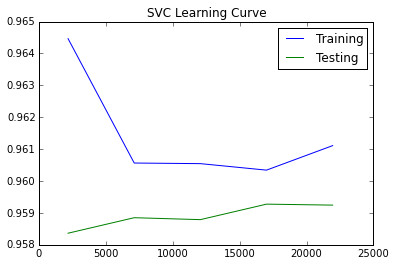

In [148]:
# d.svc_findmaxc()
d.do_modeling('svc', probability=True, C=5.01)

In [99]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# X_selectK = SelectKBest(chi2, k=23)
# X_new = X_selectK.fit_transform(Xdata, ydata)
# X_new.shape
# print X_selectK.scores_
# hd.columns

In [149]:
d.models['svc']

{'accuracy': 0.95724003887269193,
 'auc': 0.80508336441801631,
 'c_bestfit': 5.0099999999999998,
 'classification_report': '             precision    recall  f1-score   support\n\n        0.0       0.97      0.99      0.98      7781\n        1.0       0.66      0.46      0.54       451\n\navg / total       0.95      0.96      0.95      8232\n',
 'f1': 0.54285714285714293,
 'fpr': array([ 0.        ,  0.        ,  0.        , ...,  0.99974296,
         0.99987148,  1.        ]),
 'm': array([ 2195,  7134, 12073, 17012, 21951]),
 'module': 'sklearn.ensemble.SVC',
 'name': 'SVC',
 'precision': 0.65517241379310343,
 'predict_proba': array([[ 0.97435724,  0.02564276],
        [ 0.97032383,  0.02967617],
        [ 0.97417505,  0.02582495],
        ..., 
        [ 0.96887473,  0.03112527],
        [ 0.96884175,  0.03115825],
        [ 0.97212662,  0.02787338]]),
 'recall': 0.46341463414634149,
 'test_err': array([ 0.95836377,  0.95884969,  0.95878902,  0.95927497,  0.95924453]),
 'threshold':

In [250]:
# USE RFECV to rank features
from sklearn.feature_selection import RFECV
rfe = RFECV(d.log, scoring='accuracy')
rfe.fit(d.Xdata, d.ydata)

col_rankings = zip(data_cols, rfe.ranking_)
print sorted(col_rankings, key=lambda y: y[1])

[('HYPEV', 1), ('CHLYR1', 1), ('ANGEV', 1), ('MIEV', 1), ('COPDEV', 1), ('KIDWKYR', 1), ('AGE_P', 1), ('MALE', 1), ('FEMALE', 1), ('STREV', 2), ('DIBEV', 3), ('OTHERASIAN', 4), ('CHINESE', 5), ('INDIAN', 6), ('ASIANINDIAN', 7), ('CBRCHYR', 8), ('FILIPINO', 9), ('WHITE', 10), ('BLACK', 11)]


In [20]:
reload(suplearning)
disease_smoking = suplearning.Classifiers(Xdata_fielddrop, ydata_fielddrop, scale=True)
disease_smoking.svc_findmaxc()

1.91


Accuracy Score: 0.9571
             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98      7763
        1.0       0.68      0.40      0.50       447

avg / total       0.95      0.96      0.95      8210

AUC = 0.781


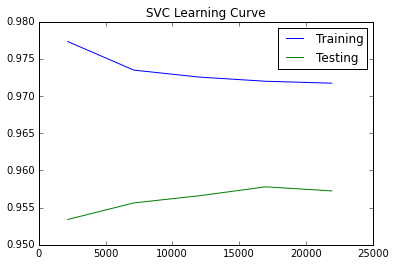

In [23]:
disease_smoking.do_modeling('svc', C=1.91, probability=True)

In [285]:
# # print disease_smoking.models['gnb']['predict_proba']
# # print disease_smoking.gnb.classes_
# threshold = 0.05
# y_predict_newthresh = []
# for point in disease_smoking.models['log']['predict_proba']:
#     if point[1] > threshold:
#         predict = 1
# #         print point
#     else:
#         predict = 0
#     y_predict_newthresh.append(predict)
# print len(y_predict_newthresh)
# print len(disease_smoking.y_test)
# # print y_predict_newthresh
# disease_smoking.scoring(disease_smoking.y_test, y_predict_newthresh)

In [558]:
# def savelossratio(p, r, z, n):
#     p = float(p)
#     r = float(r)
#     z = float(z)
#     n = float(n)
#     return 1.0/((n/(p*z)) + (1/r) - 1)

# z = 1
# n = 1


# pmode = 0.68
# rmode = 0.48
# tmode = savelossratio(pmode, rmode, z, n)

# plog = 0.7
# rlog = 0.39
# tlog = savelossratio(plog, rlog, z, n)

# pgnb = 0.32
# rgnb = 0.69
# tgnb = savelossratio(pgnb, rgnb, z, n)

# psvc = 0.66
# rsvc = 0.46
# tsvc = savelossratio(psvc, rsvc, z, n)

# print "Savings / Loss MODE is: %.2f" % (tmode)
# print "Savings / Loss LOG  is: %.2f" % (tlog)
# print "Savings / Loss GNB  is: %.2f" % (tgnb)
# print "Savings / Loss SVC  is: %.2f" % (tsvc)

### Parse and Upload NHIS Data

In [3]:
with open('data/samadult.dat') as infile:
    adult_data = infile.readlines()

adult_data = [row.replace('\r\n', '') for row in adult_data]
print len(adult_data[0])

1021
1021
1021
1021


In [5]:
adult_data_var = [line.split() for line in adult_data_var]
adult_data_var = [[row[1], int(row[-1]), row[-2].split('-')] for row in adult_data_var ]

for row in adult_data_var:
    if len(row[2]) == 1:
        row[2] = row[2]*2
adult_data_var = [row[:2] + row[-1] for row in adult_data_var]
adult_data_var = [[row[0]] + [int(row[1])] + [int(row[2])] + [int(row[3])] for row in adult_data_var]
# pprint.pprint(adult_data_var)
column_names = [row[0] for row in adult_data_var]

In [6]:
# Now parse data
adult_data_parsed = []
for adult in adult_data:
    adult_info = []
    for field in adult_data_var:
        init_offset = field[2] - 1
        final_offset = field[3]
        data = adult[init_offset:final_offset]
        if data.isspace():
            data = None
        adult_info.append(data)
    adult_data_parsed.append(adult_info)

In [7]:
adults = pd.DataFrame(adult_data_parsed, columns=column_names)

In [18]:
## Upload NHIS data
# db = pymysql.connect(host="104.131.118.159",  #your cloud ip
#                      user='root',
#                      passwd=password,
#                      db='heart_disease')


# adults.to_sql(name='nhis2013adult', con=db, if_exists='replace', flavor='mysql')
# db.close()